In [1]:
# importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#run before importing kMeans

import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# importing the dataset
dataset = pd.read_csv("buddymove_holidayiq.csv")

In [3]:
dataset.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [4]:
dataset.tail()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
244,User 245,18,139,148,129,129,168
245,User 246,22,114,228,104,84,168
246,User 247,20,124,178,104,158,174
247,User 248,20,133,149,139,144,213
248,User 249,20,143,149,139,159,143


In [5]:
dataset.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [7]:
dataset.isnull().sum()

User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64

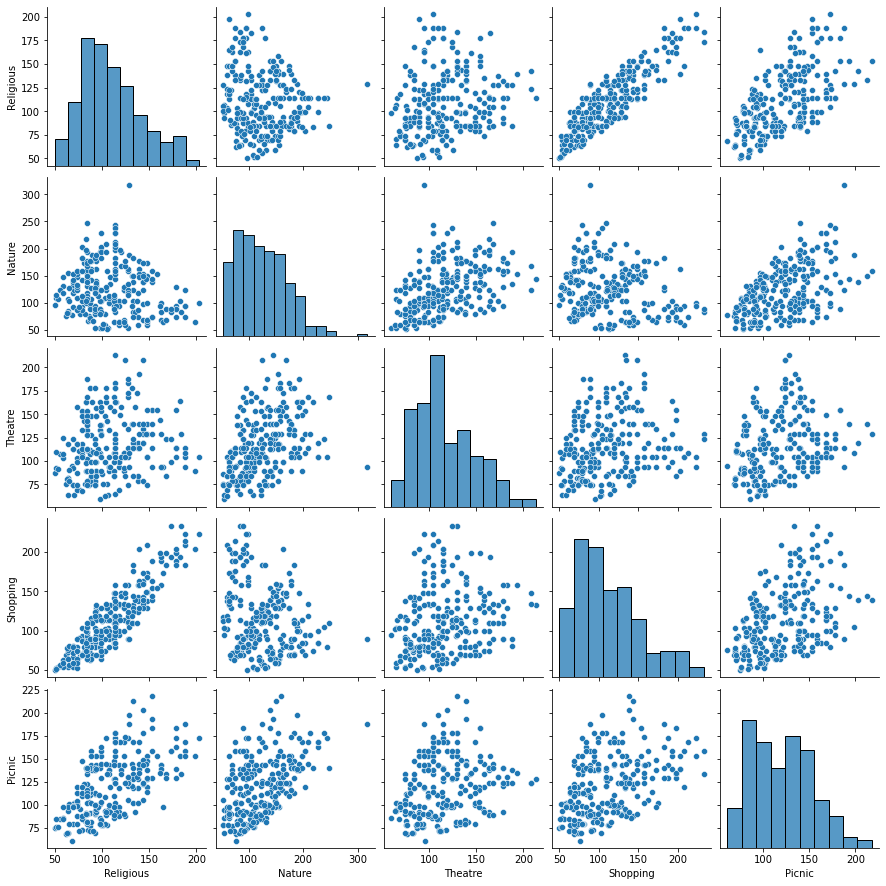

In [8]:
# Visualizing the numerical part of the data

X = dataset.iloc[:,2:7]
sns.pairplot(X)

In [9]:
# Scale the data

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

C:\Users\LAWAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAWAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAWAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LAWAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

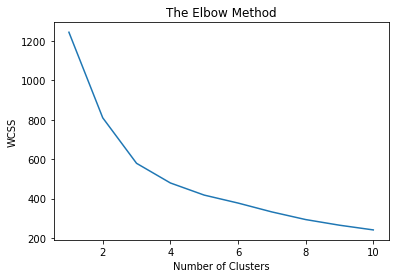

In [10]:
# using the elbow method to find the optimal number of clusters

wcss=[]
for i in range (1,11):
    Kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
#fitting k-means to the dataset

Kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=42)
y_Kmeans = Kmeans.fit_predict(X)

C:\Users\LAWAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
# Reducing the dimensionality before we can visualize

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


pca.explained_variance_ratio_

array([0.48245239, 0.31848953])

In [13]:
sum(pca.explained_variance_ratio_)

0.8009419216099173

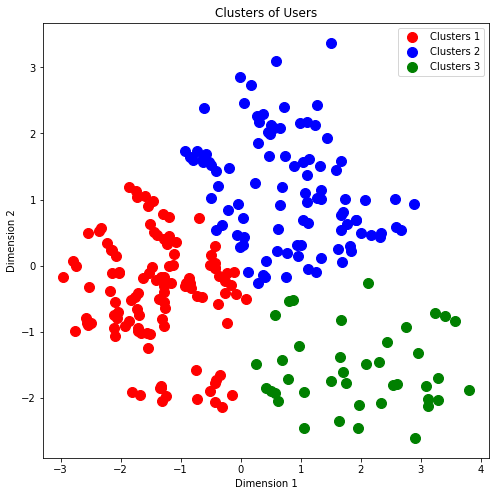

In [14]:
# Visualizing the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_Kmeans==i,0], X_reduced[y_Kmeans ==i,1],
               s=100, c=colours[i],label = 'Clusters '+str(i+1))
plt.title('Clusters of Users')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

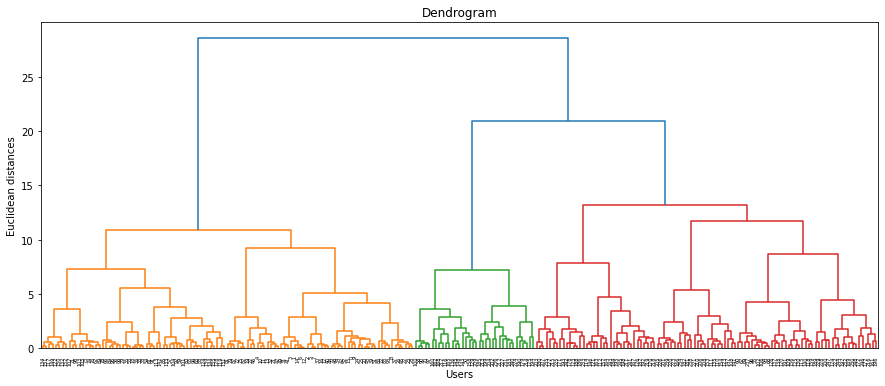

In [15]:
# using the dendogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Users")
plt.ylabel("Euclidean distances")
plt.show()

In [16]:
# fitting hierarchical clustering to the dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

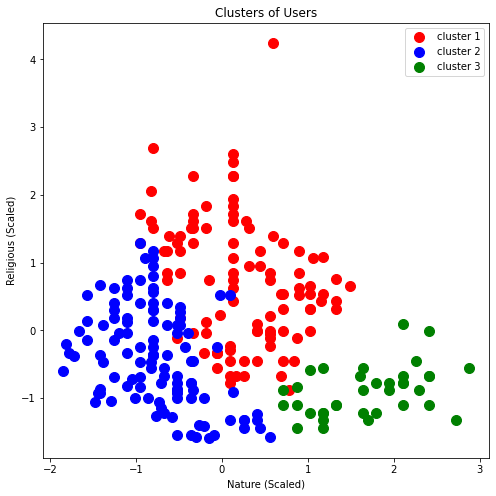

In [17]:
# Visualizing the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = "red", label = "cluster 1")
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c = "blue", label = "cluster 2")
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c = "green", label = "cluster 3")
plt.title("Clusters of Users")
plt.xlabel("Nature (Scaled)")
plt.ylabel("Religious (Scaled)")
plt.legend()
plt.show()